# Lab 2: Exploring Time-Series Data

### Required packages

In [2]:
library(astsa)
library(TSA)

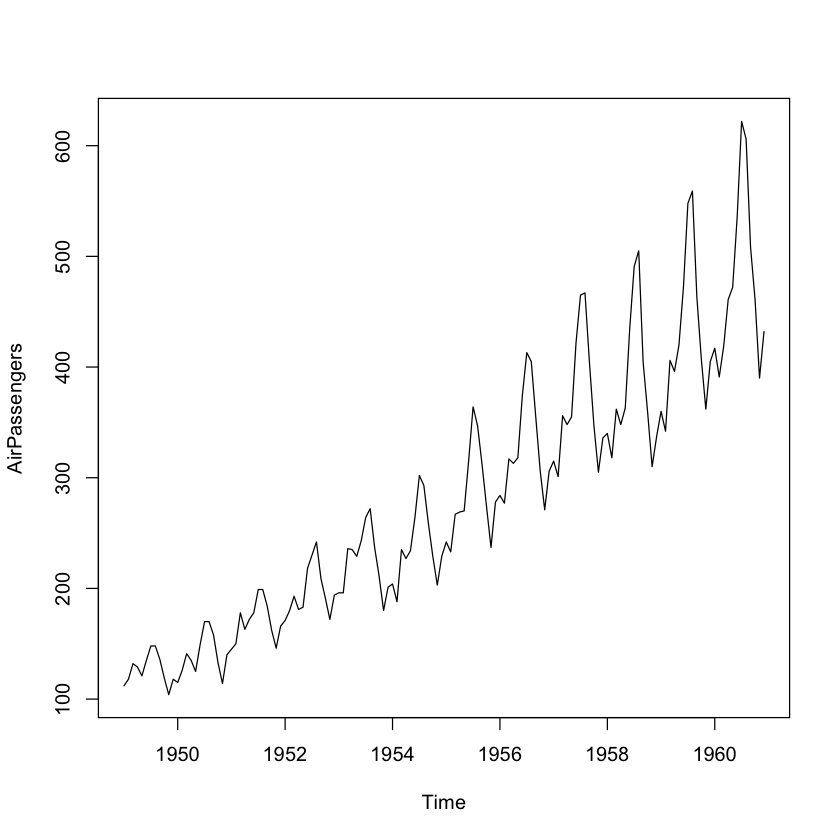

In [2]:
# Plotting AirPassengers data
plot(AirPassengers)

#### Moving average / weighted moving average

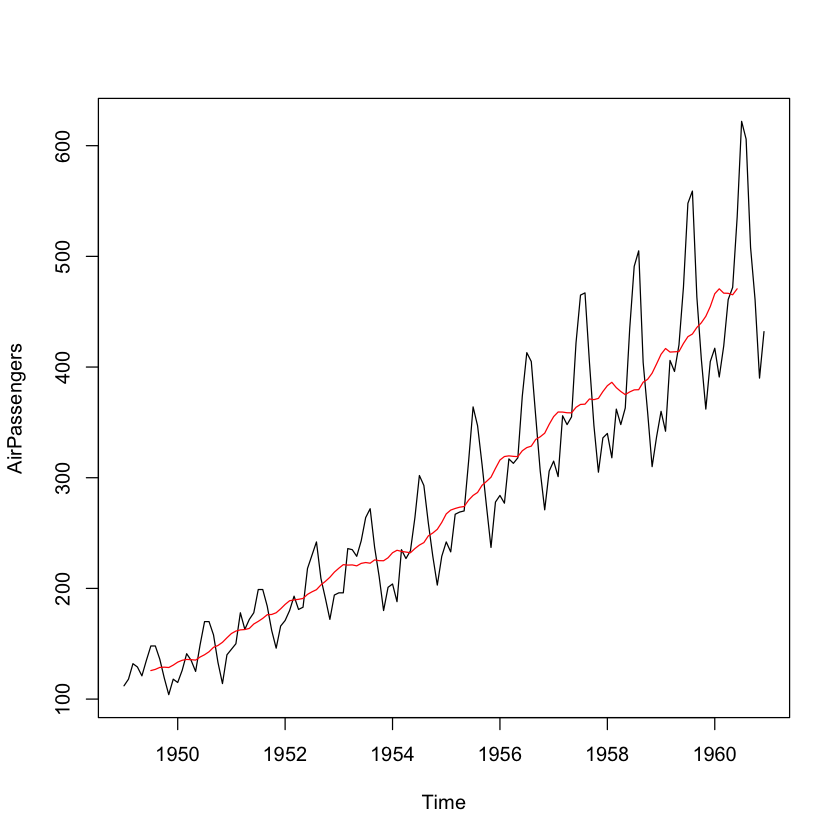

In [4]:
# Construct weights, use command filter, plot smoothed and actual.
w <- 13
win <- rep(1/w, w)
AP_smoothed <- filter(AirPassengers, win, sides=2)
plot(AirPassengers)
lines(AP_smoothed, col="red")

#### Exponential smoothing

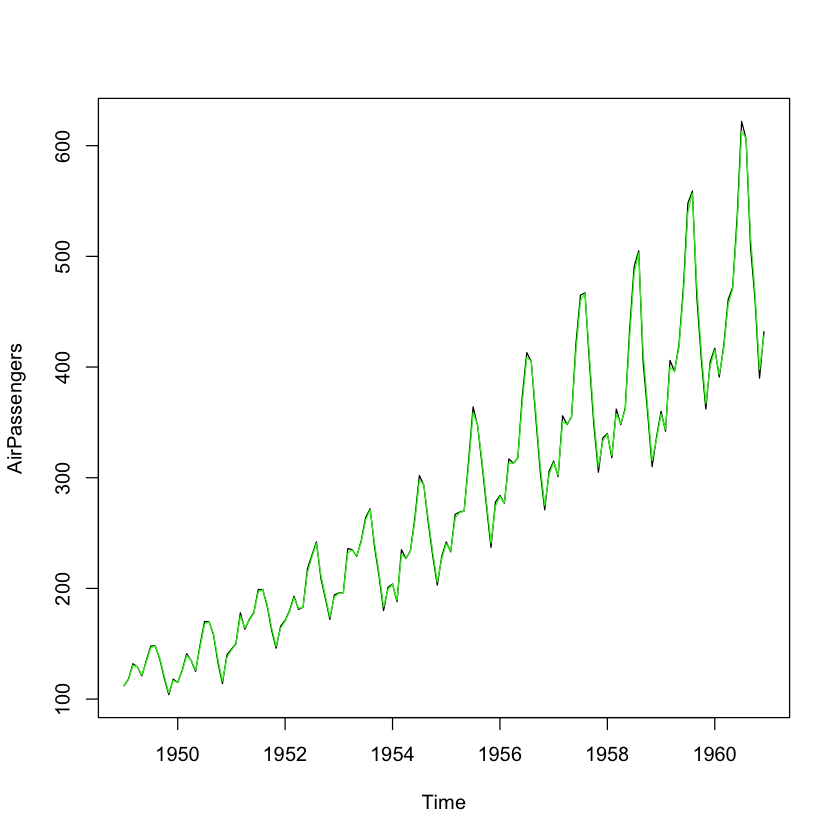

In [8]:
# Set smoothing parameter:
b = 0.1
AP_ewma <- (1-b)*filter(AirPassengers, b, method="r", init=AirPassengers[1]/(1-b))
plot(AirPassengers)
lines(AP_ewma, col="green")

#### Fitting sinusoidal model to temperature time series.
- Make sure TSA package is loaded
- Try ??tempdub
- Use the sinusoidal mean model, construct t, x1 and x2
- Run a regression and plot the (1) data and the fitted value, and (2) the residuals of the model over time in subplot (par(mfrow=c(2,1)))

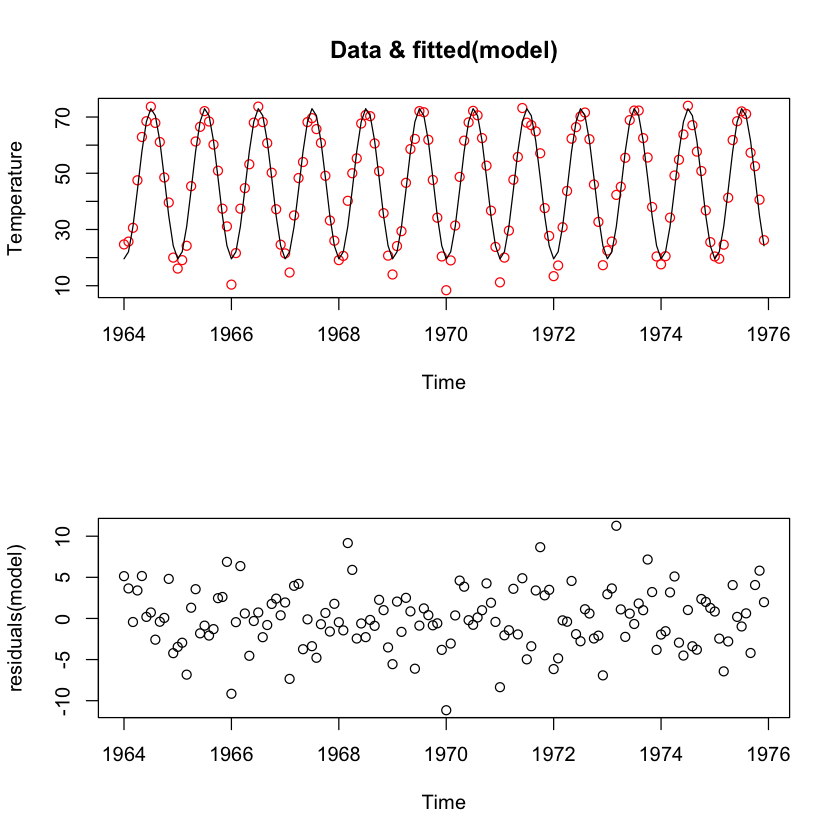

In [9]:
data(tempdub)
t <- as.numeric(time(tempdub))
x1 <- cos(2*pi*t)
x2 <- sin(2*pi*t)
model <- lm(tempdub ~ x1 + x2)

par(mfrow=c(2,1))
plot(tempdub, col="red", type="p", ylab = "Temperature", main = "Data & fitted(model)")
lines(t, fitted(model), type="l")
plot(t, residuals(model), xlab="Time")

## Seasonal means model fitted to temperature data.

In [10]:
# Try to get the seasons of tempdub
months_ <- season(tempdub)

X <- harmonic(tempdub, 2)
model <- lm(tempdub ~ X)
model <- lm(tempdub ~ months_+0)

## Linear trend in the log-AirPassengers data, the detrended series and the differenced series, with their ACFs.

In [11]:
x <- log(AirPassengers)
t <- as.numeric(time(x))
model <- lm(x ~ t)
detrend <- ts(resid(model), start=start(x), deltat=deltat(x))
dx <- diff(x)

In [12]:
# Differencing, seasonal for x and dx
# Try
s <- 12
ds.x <- diff(x, lag=s)
ds.dx <- diff(dx, lag=s)
ds.dx2 <- diff(x, lag=s, differences = 1)

## STL, LOESS

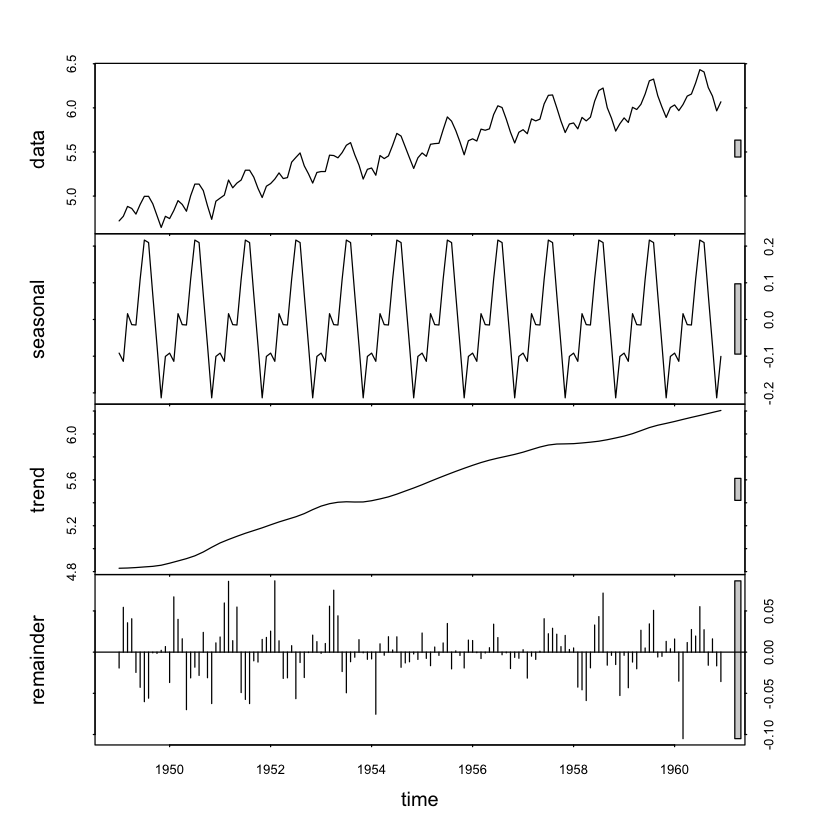

In [13]:
AP_fit <- stl(log(AirPassengers), s.window="periodic")
plot(AP_fit)

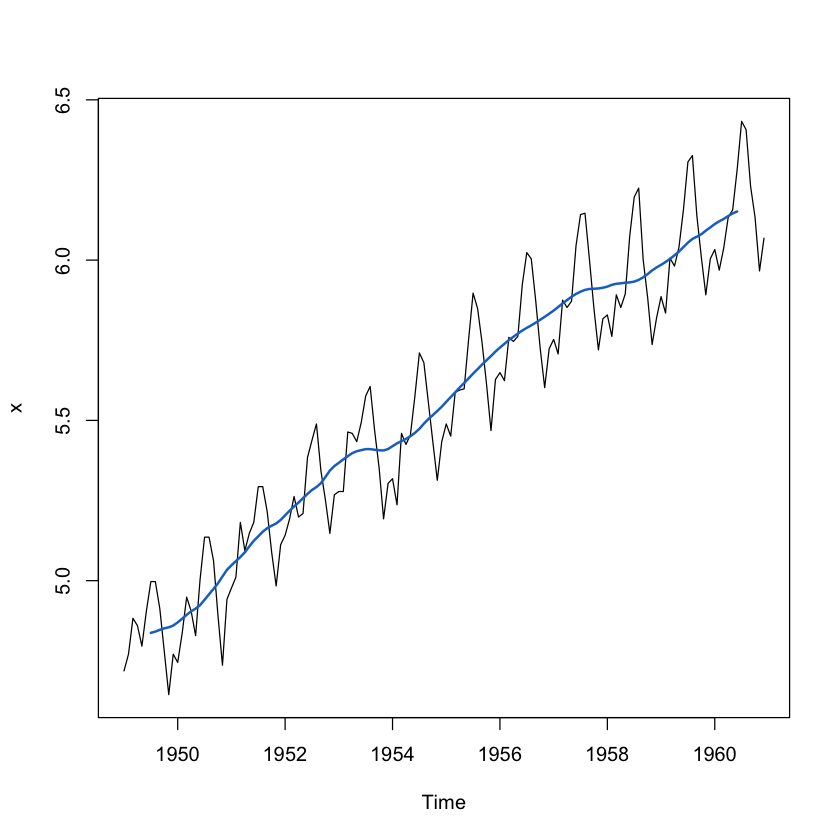

In [14]:
# Do a 1-year window weighted moving average
# Weights are equal except for the first and last observation in the window.
# Use filter command and plot the ts and the filter

wgts <- c(0.5, rep(1, 11), 0.5)/12
wma <- filter(x, sides=2, wgts)
ts.plot(x)
lines(wma, lwd=2, col=4)

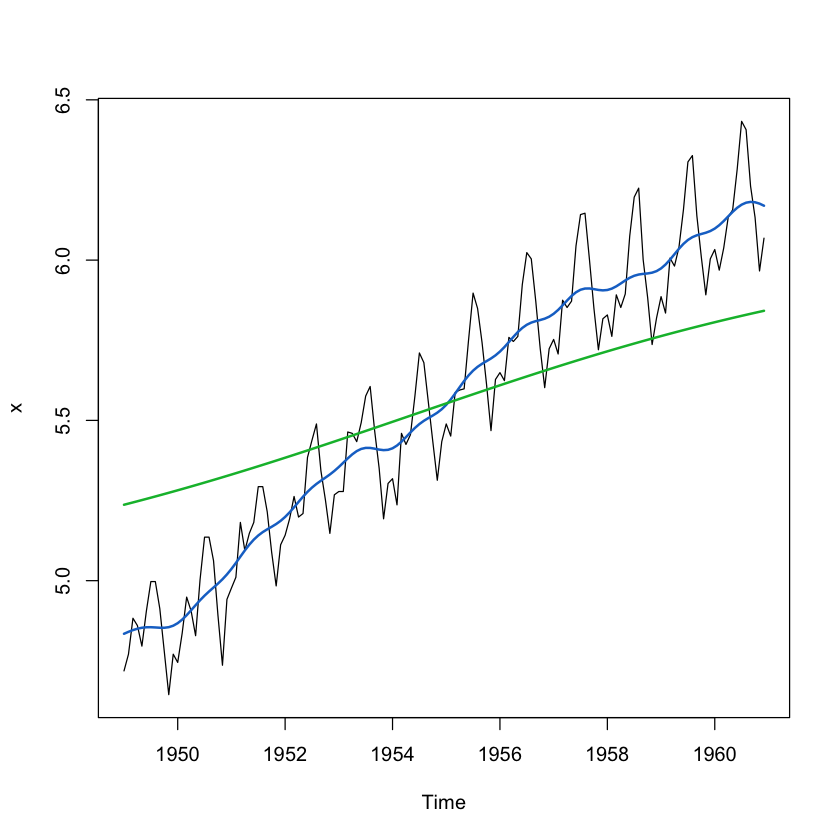

In [15]:
# Again plot the log(AirPassengers) and add lines Kernel smoother:
# Use lines command, choose kernel and bandwidth
# Note: the last options can be lwd=2 for the line style and col=#number for color

ts.plot(x)
lines(ksmooth(time(x), x, "normal", bandwidth = 1), lwd=2, col=4)
lines(ksmooth(time(x), x, "normal", bandwidth = 12), lwd=2, col=3)

#### Things to play with and check 
- What is the effect of changing the bandwidth?
- Try Lowess smoothing for the cycles and overall trend: El Nino cycle (f=.05)
- An estimate of the overall trend (this uses the default span of f=2/3)
- `ts.plot(x)` and `lines(lowess(x), lwd=2, col=3)`